# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

html = browser.html
soup = soup(html, 'html.parser')


In [5]:
# Extract all rows of data

# add all of the row data to a list of lists. Each list represents one row of data, each column is delimited by a comma.
# We will be creating a list of lists for every row. We will append each 'td' tag element to the list corresponding to each row in the table.

all_trs = soup.find_all('tr', class_='data-row')

list_of_lists = []

for tr in all_trs:
    row_list = []
    row = tr.find_all('td')
    for td in row:
        each_column_in_row = td.text
        row_list.append(each_column_in_row)
    list_of_lists.append(row_list)
    

In [6]:
#get the list of column names pythonically

column_headers = soup.find('tr')

column_names = column_headers.find_all('th')

column_name_list = []
for name in column_names:
    column_name = name.text
    column_name_list.append(column_name)

print(column_name_list)


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

mars_df = pd.DataFrame(list_of_lists , columns = column_name_list)


In [8]:
# Confirm DataFrame was created successfully

mars_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column

mars_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df[["id", "sol","ls","month"]] = mars_df[["id", "sol","ls","month"]].astype(int)
mars_df[["min_temp", "pressure"]] = mars_df[["min_temp", "pressure"]].astype(float)



In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?

mars_df["month"].max()

#There are 12 months on mars. On Mars, once the 12th month is completed, the first month begins therafter. The maximum martian month integer value that is reached in this data set is 12.

12

In [13]:
# 2. How many Martian days' worth of data are there?

# A martian day is called a sol. Taking a count of the dataframe rows in the "sol" series will generate the number of martian days (sols) worth of data.

#There are no duplicated "sols" in this data set. So we can simply take the count of rows in the "sol" column.
print(mars_df["sol"].duplicated().count)

mars_df["sol"].count()

# There are 1867 martian days (sols) worth of data. Even though the last table row lists the sol as 1977, many sols in this data set do not have data.


<bound method Series.count of 0       False
1       False
2       False
3       False
4       False
        ...  
1862    False
1863    False
1864    False
1865    False
1866    False
Name: sol, Length: 1867, dtype: bool>


1867

In [14]:
# 3. What is the average low temperature by month?

mean_min_temp_per_month = mars_df[["min_temp"]].groupby(mars_df["month"]).mean()

mean_min_temp_per_month

# Below is a dataframe of very martian month with the corresponding average low temperature for each month as 'min_temp'.


,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


Text(0.5, 1.0, 'Average Martian Low Temperature per Month')

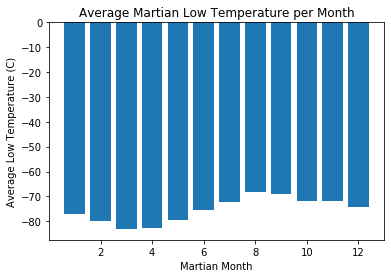

In [15]:
# Plot the average temperature by month

plt.bar(mean_min_temp_per_month.index, mean_min_temp_per_month["min_temp"])
plt.xlabel("Martian Month")
plt.ylabel("Average Low Temperature (C)")
plt.title("Average Martian Low Temperature per Month")

In [16]:
# Identify the coldest and hottest months in Curiosity's location

print(mean_min_temp_per_month.min())


# The coldest month in Curiosity's location is in the 3rd month as depicted in the plot above. The exact value for the average min_temp of month 3 is -83.3 degrees.

print(mean_min_temp_per_month.max())

# The warmest month in Curiosity's location is in the 8th month as depicted in the plot above. The exact value for the average min_temp of month 8 is -68.4 degrees.


min_temp   -83.307292
dtype: float64
min_temp   -68.382979
dtype: float64


In [17]:
# 4. Average pressure by Martian month

average_pressure_per_month = mars_df[["pressure"]].groupby(mars_df["month"]).mean()

average_pressure_per_month

# Below is a dataframe containing each martian month with its corresponding average daily atmospheric pressure per month.

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


pressure    745.054422
dtype: float64
pressure    913.30597
dtype: float64


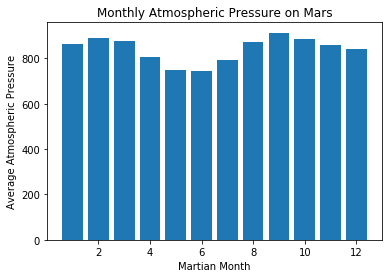

In [18]:
# Plot the average pressure by month

plt.bar(average_pressure_per_month.index,average_pressure_per_month["pressure"])
plt.xlabel("Martian Month")
plt.ylabel("Average Atmospheric Pressure")
plt.title("Monthly Atmospheric Pressure on Mars")

print(average_pressure_per_month.min())

# The 6th martian month had the lowest average atmospheric pressure. The value for the 6th martian month's pressure was 745.05

# The 9th martian month had the highest average atmospheric pressure. The value for the 9th martian month's pressure was 913.31.

print(average_pressure_per_month.max())

In [60]:
import numpy as np

earth_day_count = mars_df["terrestrial_date"].count()

earth_day_array = np.arange(1,earth_day_count+1)

earth_days = [x for x in earth_day_array]


Text(0.5, 1.0, 'Earth Days vs Martian Annual Weather')

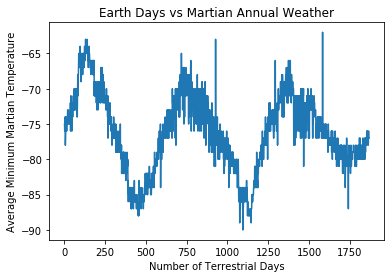

In [63]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Measure how many days elapse on earth during the time it takes Mars to circle the sun once.

#Visually estimate the result by plotting the daily minimum martian temperature versus the number of terrestrial days.

plt.plot(earth_days, mars_df["min_temp"])
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Average Minimum Martian Temperature")
plt.title("Earth Days vs Martian Annual Weather")

# To visually estimate the number of Earth days (terrestrial days) in a Martian year, I found two terrestrial days close to the cleanest intervals
# These terrestrial days were on day number 1430 (almost half-way between 1250 and 1500) and 750. Both terrestrial days are visually extreme maxima on the chart.
# The distance between either two extreme minima or two extreme maxima will help approximate the number of terrestrial days in a Martian year.
# We can subtract the terrestrial day values between two close peaks (maxima) to get this estimation.

In [65]:
1430-750

# There are about 680 days in a Martian year.
# Citing:
# https://mars.nasa.gov/resources/21392/mars-in-a-minute-how-long-is-a-year-on-mars/#:~:text=The%20Earth%20zips%20around%20the,year%20means%20longer%20seasons%20too."
# There are exactly 687 terrestrial days in one Martian year.

680

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [67]:
# Write the data to a CSV

mars_df.to_csv("mars_data.csv")


In [19]:
browser.quit()